# Final Project: Neural Networks & Art

## Clone repository

In [1]:
!rm -rf sample_data
!git clone https://github.com/pbaylies/stylegan-encoder

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 453, done.
remote: Total 453 (delta 0), reused 0 (delta 0), pack-reused 453
Receiving objects: 100% (453/453), 12.61 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (257/257), done.


## Format Input Images

In [0]:
import os
from zipfile import ZipFile
import zipfile
import shutilexplain
path = "/Users/Ellie/Desktop/train_1.zip"
directory_to_extract_to = "/Users/Ellie/Desktop/ANN/final_data"
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [0]:
label_list = []
with open('all_labels.txt', 'r') as file:
    for line in file: 
        word_list = line.split()
        image_name = word_list[0]
        if image_name in os.listdir("/Users/Ellie/Desktop/ANN/final_data"):
            label_list.append(line)
with open('train_labels.txt', 'a') as file:
    for elem in label_list:
        file.write(elem)

In [0]:
with open('train_labels.txt', 'r') as file:
    for line in file: 
        word_list = line.split()
        name = word_list[0]
        genre = word_list[-2]
        if genre == "portrait":
            shutil.move("/Users/Ellie/Desktop/ANN/final_data/"+name, "/Users/Ellie/Desktop/ANN/portrait_imgs/"+name)

In [2]:
pwd

'/content'

In [3]:
cd stylegan-encoder/

/content/stylegan-encoder


In [0]:
ls

align_images.py                        Play_with_latent_directions.ipynb
config.py*                             pretrained_example.py*
dataset_tool.py*                       README.md*
dnnlib/                                requirements.txt
encode_images.py                       run_metrics.py*
encoder/                               StyleGAN_Encoder_Tutorial.ipynb
ffhq_dataset/                          swa.py
generate_figures.py*                   teaser.png
Learn_direction_in_latent_space.ipynb  train_effnet.py
LICENSE.txt*                           training/
metrics/                               train.py*
mona_example.jpg                       train_resnet.py


In [0]:
rm -rf aligned_images raw_images

In [0]:
mkdir aligned_images raw_images

In [0]:
ls

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip -uq "/content/drive/My Drive/ladies.zip" -d "/content/stylegan-encoder/aligned_images"

## Encode faces into StyleGAN latent space

In [0]:
import gdown

In [0]:
# pretrained residual network for estimate
!gdown https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
!mkdir data
!mv finetuned_resnet.h5 data
!rm -rf generated_images latent_representations

In [0]:
!python encode_images.py --batch_size=2 --output_video=True --load_resnet='data/finetuned_resnet.h5' --lr=0.001 --decay_rate=0.8 --iterations=500 --use_l1_penalty=0.1 aligned_images/ generated_images/ latent_representations/
print("\n************ Latent code optimization finished! ***************")




Using TensorFlow backend.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







  0% 0/2 [00:00<?, ?it/s]
  0% 0/500 [00:00<?, ?it/s]WARNING:tensorflow:From /content/stylegan-encoder/stylegan-encoder/stylegan-encoder/encoder/perceptual_model.py:238: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

Screen Shot 2019-11-25 at 11.46.55 AM Screen Shot 2019-11-25 at 11.47.50 AM: loss 376.0529; lr 0.0010:   0% 0/500 [00:06<?, ?it/s]
Screen Shot 2019-11-25 at 11.46.55 AM Screen Shot 2019-11-25 at 11.47.50 AM: loss 376.0529; lr 0.0010:   0% 1/500 [00:06<58:11,  7.00s/it]
Screen Shot 2019-11-25 at 11.46.55 AM Screen Shot 2019-11-25 at 11.47.50 AM: loss 370.9434; lr 0.0010:   0% 1/500 [00:07<58:11,  7.00s/it]
Screen Shot 2019-11-25 at 11.46.55 AM Screen Shot 2019-11-25 

## Load network

In [0]:
import os
import dnnlib, pickle
import dnnlib.tflib as tflib
tflib.init_tf()
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

model_dir = 'cache/'
model_path = [model_dir+f for f in os.listdir(model_dir) if 'stylegan-ffhq' in f][0]
print("Loading StyleGAN model from %s..." %model_path)

with dnnlib.util.open_url(model_path) as f:
  generator_network, discriminator_network, averaged_generator_network = pickle.load(f)
  
print("StyleGAN loaded & ready for sampling!")

Loading StyleGAN model from cache/263e666dc20e26dcbfa514733c1d1f81_karras2019stylegan-ffhq-1024x1024.pkl...
StyleGAN loaded & ready for sampling!


## Display results

In [0]:
def generate_images(generator, latent_vector, z = True):
    batch_size = latent_vector.shape[0]
    
    if z: #Start from z: run the full generator network
        return generator.run(latent_vector.reshape((batch_size, 512)), None, randomize_noise=False, **synthesis_kwargs)
    else: #Start from w: skip the mapping network
        return generator.components.synthesis.run(latent_vector.reshape((batch_size, 18, 512)), randomize_noise=False, **synthesis_kwargs)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_imgs(model, rows, columns):
  for i in range(rows):
    f, axarr = plt.subplots(1,columns, figsize = (20,8))
    for j in range(columns):
      img = generate_images(model, np.random.randn(1,512), z = True)[0]
      axarr[j].imshow(img)
      axarr[j].axis('off')
      axarr[j].set_title('Resolution: %s' %str(img.shape))
    plt.show()

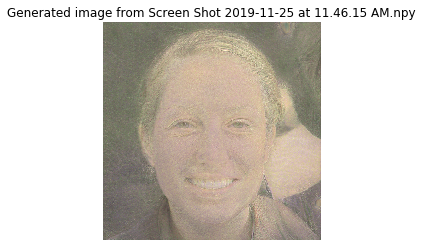

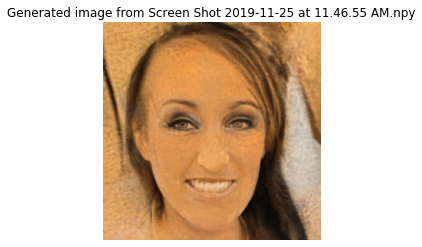

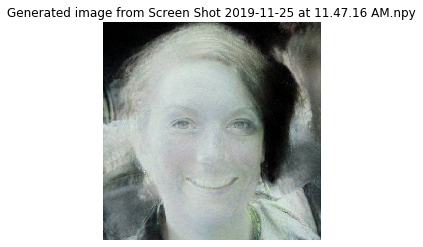

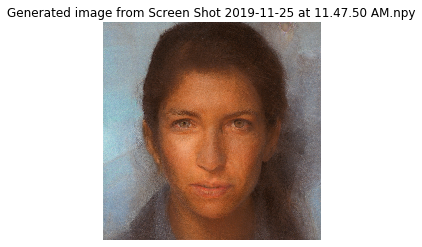

In [0]:
import numpy as np

for f in sorted(os.listdir('latent_representations')):
  w = np.load('latent_representations/' + f).reshape((1,18,-1))
  img = generate_images(averaged_generator_network, w, z = False)[0]
  plt.imshow(img)
  plt.axis('off')
  plt.title("Generated image from %s" %f)
  plt.show()

>> Output reflects images generated by GAN from input image subset of Picasso portraits 